# Project: Investigate a Dataset - TDP Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Columns:
   Imdb_id         -  -               original_title
   cast                -  -              popularity
   director          -  -             production_companies
   release_year  -  -            revenue
   budget_adj     -  -           revenue_adj


### Question(s) for Analysis

##### Which acrtor achieve revenue in their movies
##### who the director has top successfull movies
##### production companies revenue vs budget (loss or gain)


In [1]:
# import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline






In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
#load data from csv file and check the null values volume
df= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Check the statistics for the data frame
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Check the number of columns and rows for the dataframe
df.shape

(10866, 21)

In [6]:
# Get the number of NA/Null values for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

#### Which data to be droped

For the questions about cast and director, it will be necessary to drop the rows has NA values.
Production_companies will droped in the question number 3.

#### which data to be filled
There is no data can be filled.

#### NA data to be ignored
The columns home page, tagline and keywords NA values will be ignored because it is not inculded in the calculations
 

In [7]:
''' Drop the cast and directors NA values from 
the dataframe to calculate the average revenue and top rated movies
'''
df.dropna(subset=['cast','director'], how='any',inplace=True)

In [8]:
# Check features after drop the NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 10865
Data columns (total 21 columns):
id                      10752 non-null int64
imdb_id                 10746 non-null object
popularity              10752 non-null float64
budget                  10752 non-null int64
revenue                 10752 non-null int64
original_title          10752 non-null object
cast                    10752 non-null object
homepage                2898 non-null object
director                10752 non-null object
tagline                 8007 non-null object
keywords                9312 non-null object
overview                10749 non-null object
runtime                 10752 non-null int64
genres                  10732 non-null object
production_companies    9780 non-null object
release_date            10752 non-null object
vote_count              10752 non-null int64
vote_average            10752 non-null float64
release_year            10752 non-null int64
budget_adj              1

In [9]:
df.isnull().sum()

id                         0
imdb_id                    6
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7854
director                   0
tagline                 2745
keywords                1440
overview                   3
runtime                    0
genres                    20
production_companies     972
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Add column Main Actor/Actress by applying lamda function to split the cast cell by | and get the first one
df['MainActor']= df['cast'].apply(lambda x: x.split('|')[0])
# another way to get the Main actor df['MainActor']=[ act.split('|')[0] for act in df['cast'] ]


In [11]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,MainActor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (top acrtors achieved revenue in their movies)

In [12]:
#group by Main actor and sum the revenue per actor.
top_actors = df.groupby('MainActor')['revenue'].sum().sort_values(ascending=False)

In [13]:
top_actors =top_actors.head(5)

Text(0,0.5,'Revenue')

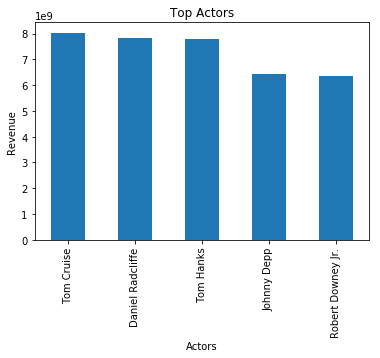

In [14]:
top_actors.plot(kind='bar',title="Top Actors", label='Actor');
plt.xlabel("Actors")
plt.ylabel('Revenue')


### Research Question 2 (who the director has top rated movies)

In [15]:
# group by directors to get the average of the vote average column for all movies directed by them.

top_five_directors=df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(5)

Text(0,0.5,'Total Average Rate')

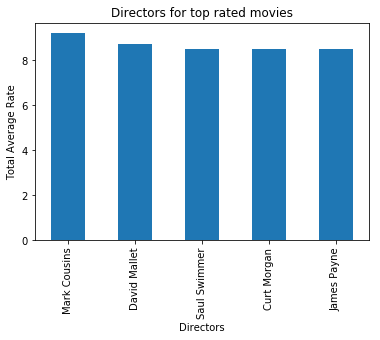

In [16]:
top_five_directors.plot(kind='bar',title="Directors for top rated movies", label='Director');
plt.xlabel("Directors")
plt.ylabel('Total Average Rate')


### Extra Step
Comparing between the actors and directors for the top rated movies

In [17]:
top_five_actors=df.groupby('MainActor')['vote_average'].mean().sort_values(ascending=False).head(5)

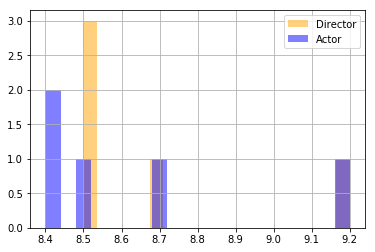

In [18]:
top_five_directors.hist(alpha=0.5, bins=20, color='orange' ,label='Director');
top_five_actors.hist(alpha=0.5, bins=20, color='blue' ,label='Actor');
plt.legend();


### Question 3 (production companies revenue vs budget (loss or gain))

In [19]:
def fillNAWithValue(df,colName,ValueToFill):
    '''
    This function to fill the Na values  in column
    with specific word
    args: 
        df : the dataframe
        colName: the column name will be filled
        ValueToFill: the value will be used to fill the NA
    '''
    df[colName].fillna(ValueToFill, inplace=True)
    

In [20]:
#Fill NA with Other word
fillNAWithValue(df,'production_companies','Other')

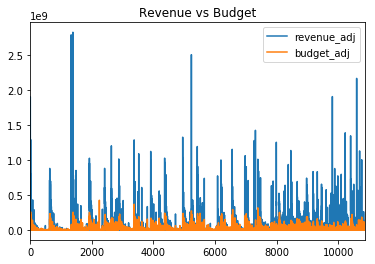

In [47]:
companies_revenue = df.groupby('production_companies')[['production_companies','revenue_adj','budget_adj']].tail(5)
companies_revenue.plot(title='Revenue vs Budget');

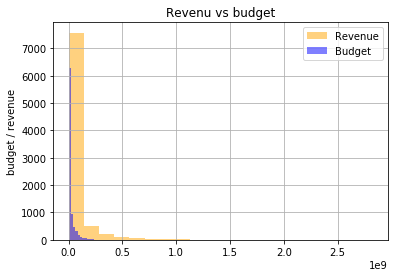

In [43]:
companies_revenue['revenue_adj'].hist(alpha=0.5, bins=20, color='orange' ,label='Revenue');
companies_revenue['budget_adj'].hist(alpha=0.5, bins=20, color='blue' ,label='Budget');
plt.title('Revenu vs budget');
plt.ylabel('budget / revenue');
plt.legend();


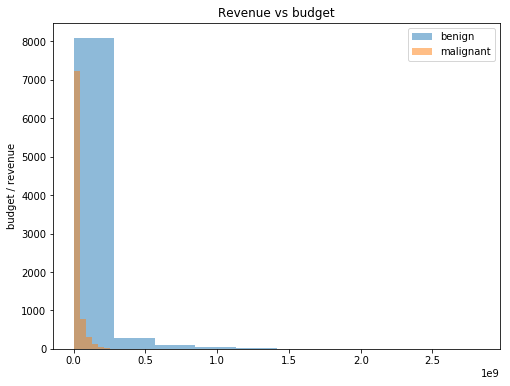

In [44]:
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(companies_revenue['revenue_adj'], alpha=0.5, label='benign')
ax.hist(companies_revenue['budget_adj'], alpha=0.5, label='malignant')
ax.set_title('Revenue vs budget')

ax.set_ylabel('budget / revenue')
ax.legend(loc='upper right')
plt.show();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0